# Introduction

# Exact solution

We represent a weighted, non-oriented graph with an adjacency list. We also assume
that a graph is always connected, i.e. that it is always possible to reach a node from any
other node.

- *In a complete graph, all nodes are connected to one another. What is the number of Hamiltonian paths in a complete graph of size n?*



Among a set N of n nodes, we can describe each Hamilton path as an ordered combinaison of all ellements of N. It's an arrangment. In a complete graph, all nodes are conected so all arrangment n describe an Hamilton path.The number of possible arrangement ${\displaystyle A_{n}^{n}}=n!$ 

The number of Hamiltonian paths in a complete graph of size n is $n!$

- *Write a Python function that enumerates all Hamiltonian paths starting from a node i in a graph of size n, and returns the shortest one. What is its time complexity?*

We build a recursive function that return the list of all existing Hamiltonian paths. Complexity: (n-1)!

In [2]:
import networkx as nx

In [65]:

def HamiltonRecursiveLister(PathList_,Path,Graph,Curentnode): 
    Path.append(Curentnode)
    if len(Path)==Graph.number_of_nodes():
        PathList_.append(Path.copy())
        del Path[-1]
    else:
        for node in Graph.neighbors(Curentnode):
            if node not in Path:
                PathList_=HamiltonRecursiveLister(PathList_,Path,Graph,node)
        del Path[-1]
                
    
    return PathList_
    

We build a test to see if our function worl properly.

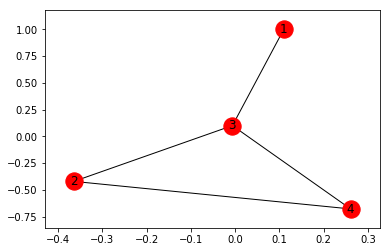

In [71]:
import matplotlib.pyplot as plt
testG= nx.Graph()
testG.add_nodes_from([1,2,3,4])
testG.add_weighted_edges_from([(3, 1,1),(3,2,2),(4,2,1),(3,4,1)])
nx.draw_networkx(testG)

In [84]:
print(HamiltonRecursiveLister([],[],testG,1)==[[1, 3, 2, 4], [1, 3, 4, 2]],HamiltonRecursiveLister([],[],testG,2)==[[2, 4, 3, 1]],HamiltonRecursiveLister([],[],testG,3)==[],HamiltonRecursiveLister([],[],testG,4)==[[4, 2, 3, 1]])

True True True True


It work.

We now build a recursive function that enumerates all Hamiltonian paths starting from a node i in a graph of size n, and returns the shortest one

In [88]:
#HamiltonRecursiveFinder. Prend en parametre un graphe de taille N et un noeud i
def HRF(Graph,Curentnode,BestPath=[],Bestlength=-1,Pathlength=0,CurentPath=[]): 
    CurentPath.append(Curentnode) #C=O(1)
    if len(CurentPath)==Graph.number_of_nodes(): #C=O(1) (we assume this number is not calculated)
        if Bestlength>Pathlength or Bestlength==-1: #C=O(1)
            BestPath=CurentPath.copy() #C=O(N)
            Bestlength=Pathlength #C=O(1)
        del CurentPath[-1]
    else:
        for node in Graph.neighbors(Curentnode): #C=(n-1)*C(HRF(graphe de taille n-1))
            if node not in CurentPath:#C=O(1)
                length=Pathlength+Graph[Curentnode][node]['weight']#C=O(1)
                if length < Bestlength  or Bestlength==-1:#C=O(1)
                    BestPath, Bestlength=HRF(Graph,node,BestPath,Bestlength,length,CurentPath)#C=O(HRF(graphe de taille n-1)
        del CurentPath[-1] #C=O(1)
                
    
    return BestPath, Bestlength

We test it

In [89]:

print(HRF(testG,1)==([1, 3, 4, 2], 3))

True


It work
For a graph of size N, the time complexity is $N*(N-1)!=N!$

- *Finally, write a Python function that finds an exact solution to the Traveling SalesmanProblem for a graph of size n.*

We jeust need to applly our HRF function to each nodes of the graph and find the best one

In [104]:
#Traveling Salesman Problem Solver C=O(n*n!)
def TSPS(Graph):#C=O(1)
    Path=[]#C=O(1)
    length=-1#C=O(1)
    for node in Graph.nodes(): #C=O(n*n!)
        P,d= HRF(Graph,node) #C=O(n!)
        if (d<length or length==-1)and d!=-1:
            Path=P
            length=d
    return Path,length
        

In [105]:
TSPS(testG)

([1, 3, 4, 2], 3)

# The Nearest Neighbor heuristic

- *Write a function that implements the Nearest Neighbor heuristic.*

In [110]:
def NNH(Graph,node):
    Path=[node]#C=O(1)
    N=len(Graph)#C=O(1)
    while len(Path)<N:#C=O(n^2)
        successor=-1 #C=O(1)
        d=-1 #C=O(1)
        for nd in Graph.neighbors(node): #C=O(n)
            if nd not in Path and (Graph[nd][node]['weight']<d or d==-1): #C=O(1)
                successor =nd #C=O(1)
                d=Graph[nd][node]['weight'] #C=O(1)
        if successor==-1: return [] 
        node=successor #C=O(1)
        Path.append(node) #C=O(1)
    return Path

In [112]:
NNH(testG,1)

[1, 3, 4, 2]

- *What is its time complexity?*

We have a time complexity C=O(n^2)

- *Find a graph for which this heuristic does not compute the shortest Hamiltonian path.*

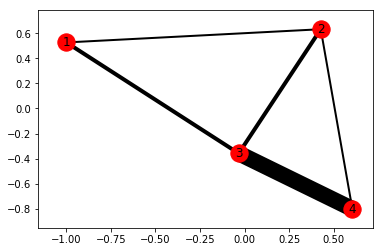

In [126]:
trapG= nx.Graph()
trapG.add_nodes_from([1,2,3,4])
trapG.add_weighted_edges_from([(1, 2,1),(1,3,2),(2,3,2),(2,4,1),(3,4,8)])
pos = nx.spring_layout(trapG)
nx.draw_networkx_nodes(trapG, pos)
nx.draw_networkx_labels(trapG, pos)
for edg in trapG.edges():
     nx.draw_networkx_edges(trapG, pos, edgelist=[edg],
                       width=2*trapG[edg[0]][edg[1]]["weight"])

In [130]:
print("exact sol : ",HRF(trapG,1),", sol with NNH:",(NNH(trapG,1)))



exact sol :  ([1, 3, 2, 4], 5) , sol with NNH: [1, 2, 4, 3]


In [120]:
for edg in trapG.edges():
    print (trapG[edg[0]][edg[1]]["weight"])

1
2
2
1
4


# Conclusion

4